# Exploring the Impact of Academic and Socioeconomic Factors on Student Mental Health and Well-being

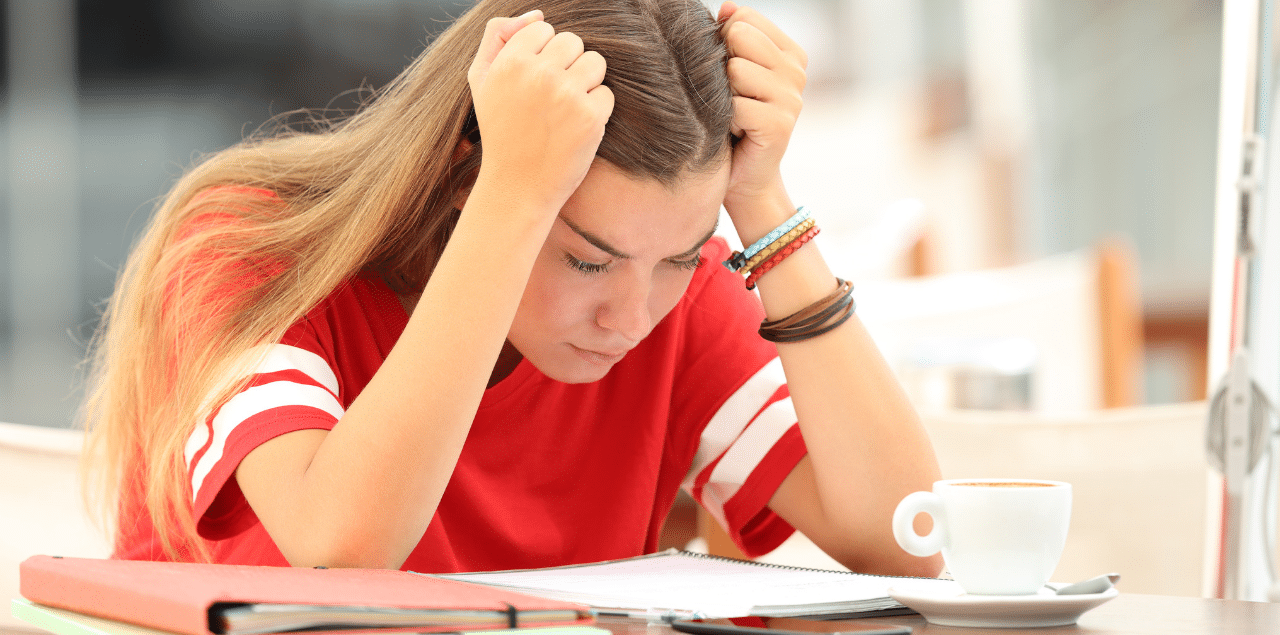!

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('student_mental_health_data.csv')

In [4]:
df.head()

Student_ID  Age      Gender Year_of_Study  Education_Level    Course  \
0           1   24        Male      4th Year  Post-Graduation   Science   
1           2   22        Male      4th Year              PhD      Arts   
2           3   19        Male      4th Year  Post-Graduation   Science   
3           4   22  Non-Binary      2nd Year  Post-Graduation   Science   
4           5   18      Female      1st Year              PhD  Commerce   

   Academic_Performance Family_Income Residence_Type  Social_Connections  ...  \
0                 65.51          High   Staying Home                   1  ...   
1                 51.09          High         Hostel                   0  ...   
2                 72.68           Low        Outside                   5  ...   
3                 54.63           Low        Outside                   3  ...   
4                 60.88           Low   Staying Home                   4  ...   

   Stress_Level Sleep_Hours  Substance_Use Past_Trauma  \
0          High        9.42             No          No   
1           Low        8.18             No          No   
2           Low        5.33            Yes         Yes   
3          High        6.93             No         Yes   
4           Low        8.05             No          No   

  Counseling_Availability Counseling_Utilization Family_Support  \
0                     Yes                     No           High   
1                     Yes                     No         Medium   
2                     Yes                    Yes            Low   
3                     Yes                    Yes            Low   
4                     Yes                     No            Low   

  Suicidal_Thoughts Suicide_Attempt      Reason_for_Stress  
0                No              No          Family issues  
1               Yes              No  Relationship problems  
2               Yes             Yes       Financial issues  
3                No             Yes  Relationship problems  
4                No              No       Financial issues  

[5 rows x 21 columns]

In [5]:
df.tail()

Student_ID  Age      Gender Year_of_Study  Education_Level       Course  \
9995        9996   21        Male      3rd Year       Graduation      Science   
9996        9997   24      Female      3rd Year              PhD  Engineering   
9997        9998   21      Female      3rd Year       Graduation  Engineering   
9998        9999   22  Non-Binary      4th Year              PhD     Commerce   
9999       10000   18      Female      4th Year  Post-Graduation         Arts   

      Academic_Performance Family_Income Residence_Type  Social_Connections  \
9995                 84.96           Low        Outside                   1   
9996                 97.30           Low        Outside                   1   
9997                 95.65        Medium         Hostel                   3   
9998                 92.64           Low   Staying Home                   5   
9999                 73.68           Low   Staying Home                   0   

      ...  Stress_Level Sleep_Hours  Substance_Use Past_Trauma  \
9995  ...           Low        4.40            Yes          No   
9996  ...        Medium        6.07            Yes          No   
9997  ...           Low        4.41             No          No   
9998  ...          High        9.15            Yes          No   
9999  ...          High        8.05            Yes          No   

     Counseling_Availability Counseling_Utilization Family_Support  \
9995                      No                     No            Low   
9996                     Yes                    Yes           High   
9997                      No                    Yes            Low   
9998                     Yes                    Yes         Medium   
9999                      No                     No         Medium   

     Suicidal_Thoughts Suicide_Attempt      Reason_for_Stress  
9995                No              No       Financial issues  
9996                No              No          Family issues  
9997                No             Yes       Financial issues  
9998                No              No       Financial issues  
9999                No              No  Relationship problems  

[5 rows x 21 columns]

In [6]:
df.shape

(10000, 21)

In [7]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Year_of_Study', 'Education_Level',
       'Course', 'Academic_Performance', 'Family_Income', 'Residence_Type',
       'Social_Connections', 'Mental_Health_Score', 'Stress_Level',
       'Sleep_Hours', 'Substance_Use', 'Past_Trauma',
       'Counseling_Availability', 'Counseling_Utilization', 'Family_Support',
       'Suicidal_Thoughts', 'Suicide_Attempt', 'Reason_for_Stress'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Student_ID                 0
Age                        0
Gender                     0
Year_of_Study              0
Education_Level            0
Course                     0
Academic_Performance       0
Family_Income              0
Residence_Type             0
Social_Connections         0
Mental_Health_Score        0
Stress_Level               0
Sleep_Hours                0
Substance_Use              0
Past_Trauma                0
Counseling_Availability    0
Counseling_Utilization     0
Family_Support             0
Suicidal_Thoughts          0
Suicide_Attempt            0
Reason_for_Stress          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Year_of_Study            10000 non-null  object 
 4   Education_Level          10000 non-null  object 
 5   Course                   10000 non-null  object 
 6   Academic_Performance     10000 non-null  float64
 7   Family_Income            10000 non-null  object 
 8   Residence_Type           10000 non-null  object 
 9   Social_Connections       10000 non-null  int64  
 10  Mental_Health_Score      10000 non-null  float64
 11  Stress_Level             10000 non-null  object 
 12  Sleep_Hours              10000 non-null  float64
 13  Substance_Use            10000 non-null  object 
 14  Past_Trauma            

In [11]:
df.describe()

Student_ID           Age  Academic_Performance  Social_Connections  \
count  10000.00000  10000.000000          10000.000000        10000.000000   
mean    5000.50000     20.999400             75.128297            2.513200   
std     2886.89568      2.007088             14.408652            1.692841   
min        1.00000     18.000000             50.010000            0.000000   
25%     2500.75000     19.000000             62.510000            1.000000   
50%     5000.50000     21.000000             75.255000            3.000000   
75%     7500.25000     23.000000             87.630000            4.000000   
max    10000.00000     24.000000            100.000000            5.000000   

       Mental_Health_Score   Sleep_Hours  
count         10000.000000  10000.000000  
mean              4.972233      7.011468  
std               2.899176      1.729888  
min               0.000000      4.000000  
25%               2.470000      5.537500  
50%               4.970000      7.020000  
75%               7.450000      8.520000  
max              10.000000     10.000000

In [12]:
df.nunique()

Student_ID                 10000
Age                            7
Gender                         3
Year_of_Study                  4
Education_Level                3
Course                         4
Academic_Performance        4322
Family_Income                  3
Residence_Type                 3
Social_Connections             6
Mental_Health_Score         1001
Stress_Level                   3
Sleep_Hours                  601
Substance_Use                  2
Past_Trauma                    2
Counseling_Availability        2
Counseling_Utilization         2
Family_Support                 3
Suicidal_Thoughts              2
Suicide_Attempt                2
Reason_for_Stress              4
dtype: int64

In [13]:
df = df.drop(['Student_ID'], axis = 1)

In [14]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns --->")
print(object_columns)

Object type columns --->
Index(['Gender', 'Year_of_Study', 'Education_Level', 'Course', 'Family_Income',
       'Residence_Type', 'Stress_Level', 'Substance_Use', 'Past_Trauma',
       'Counseling_Availability', 'Counseling_Utilization', 'Family_Support',
       'Suicidal_Thoughts', 'Suicide_Attempt', 'Reason_for_Stress'],
      dtype='object')


In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns ---> ")
print(numerical_columns)


Numerical type columns ---> 
Index(['Age', 'Academic_Performance', 'Social_Connections',
       'Mental_Health_Score', 'Sleep_Hours'],
      dtype='object')


In [16]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [17]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [18]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Gender', 'Year_of_Study', 'Education_Level', 'Course', 'Family_Income', 'Residence_Type', 'Stress_Level', 'Substance_Use', 'Past_Trauma', 'Counseling_Availability', 'Counseling_Utilization', 'Family_Support', 'Suicidal_Thoughts', 'Suicide_Attempt', 'Reason_for_Stress']
Non-Categorical Features: []
Discrete Features: ['Age', 'Social_Connections']
Continuous Features: ['Academic_Performance', 'Mental_Health_Score', 'Sleep_Hours']


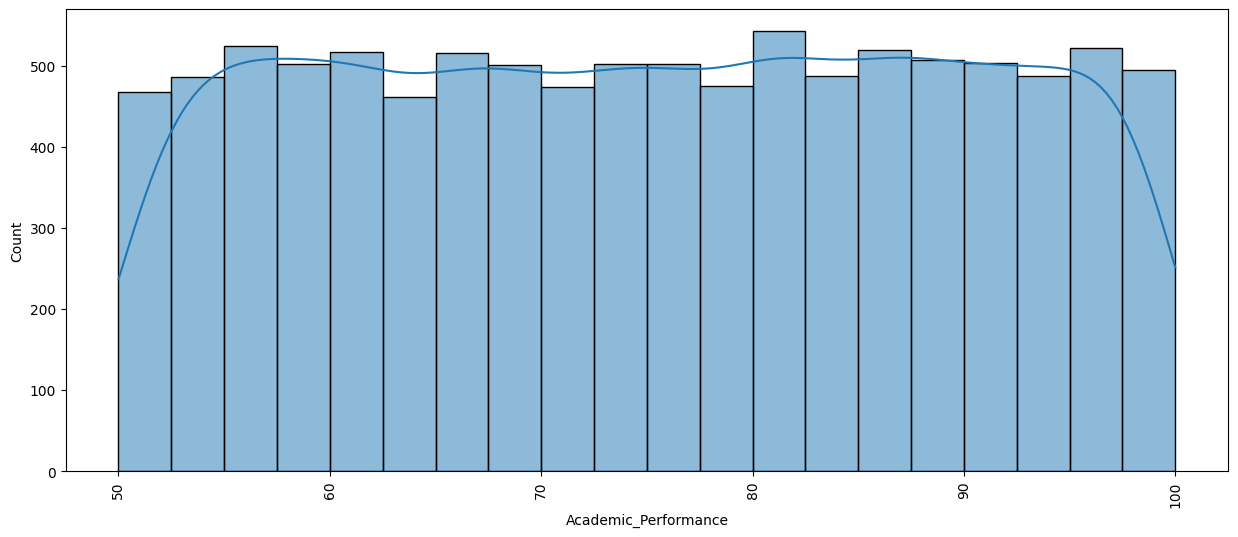

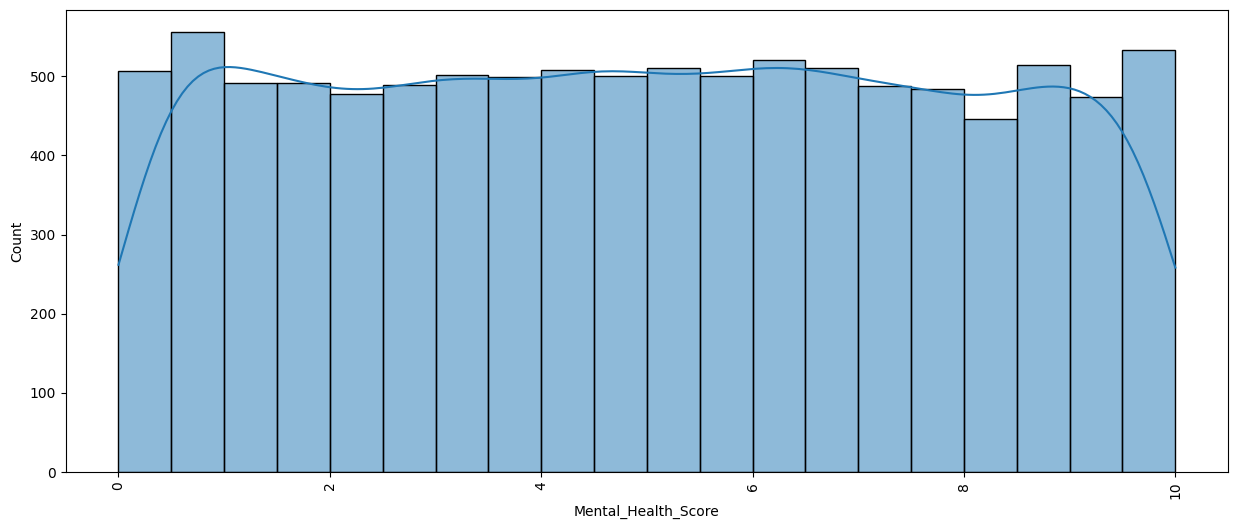

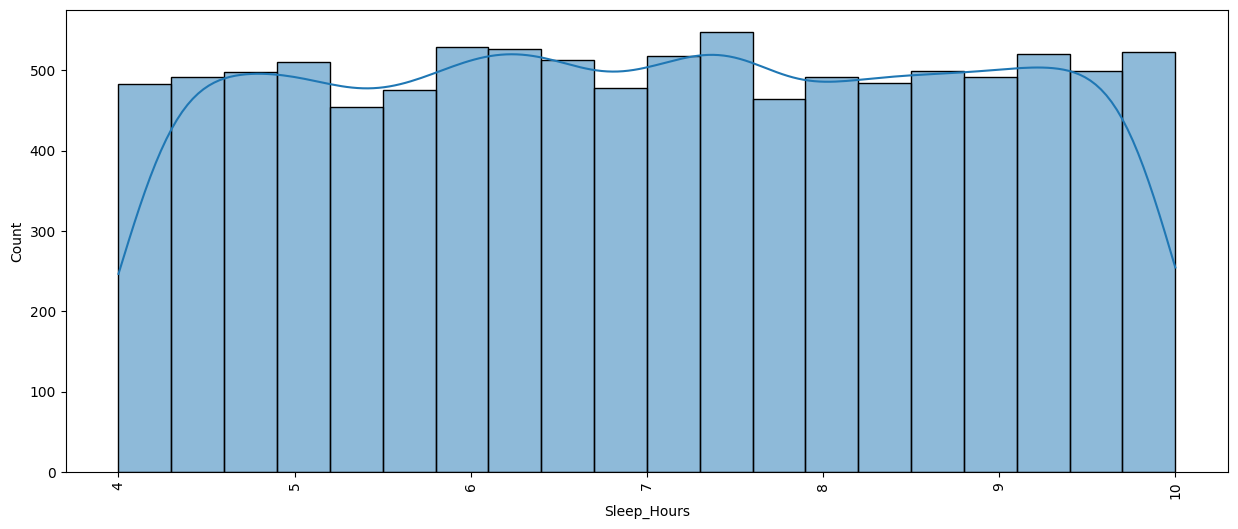

In [19]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

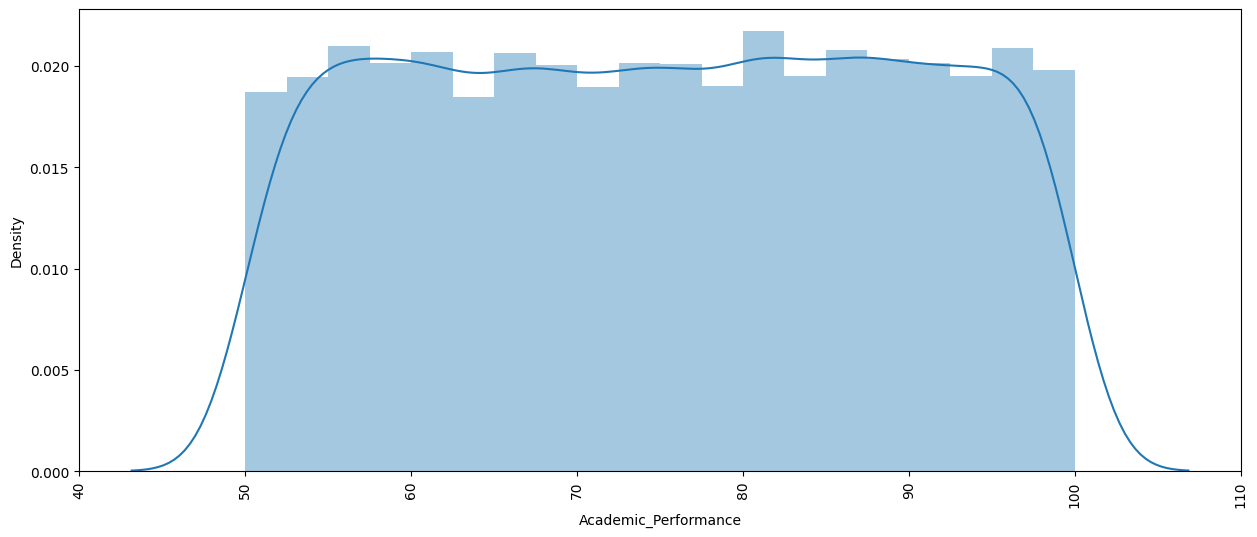

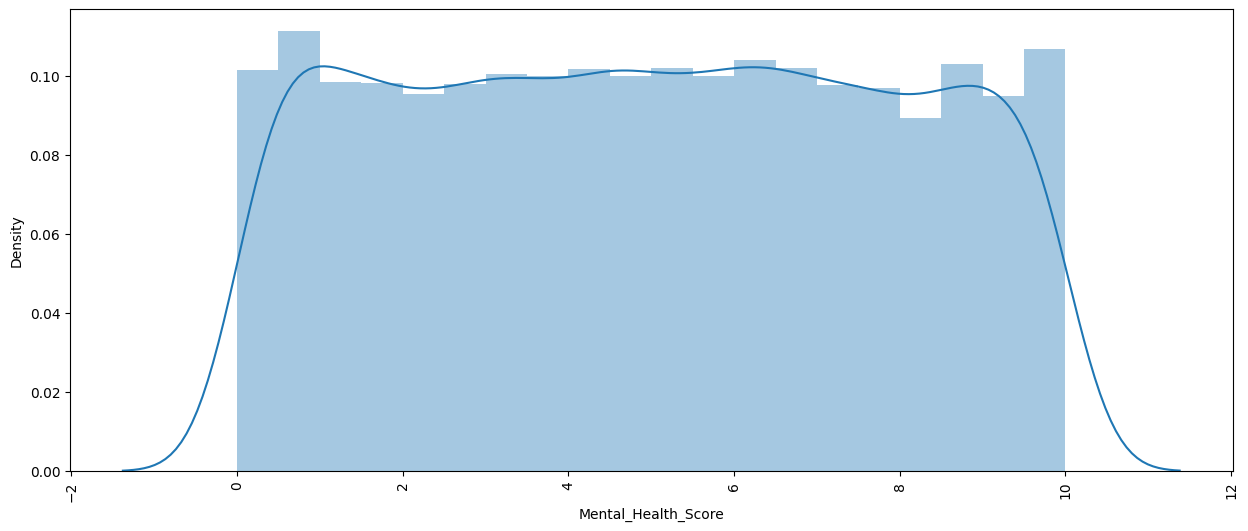

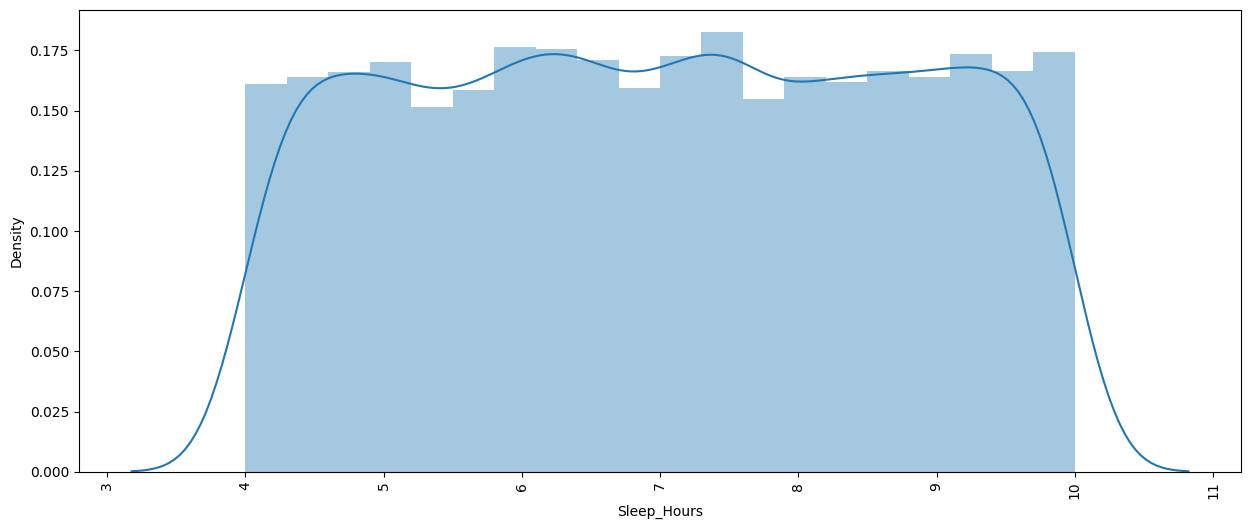

In [20]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

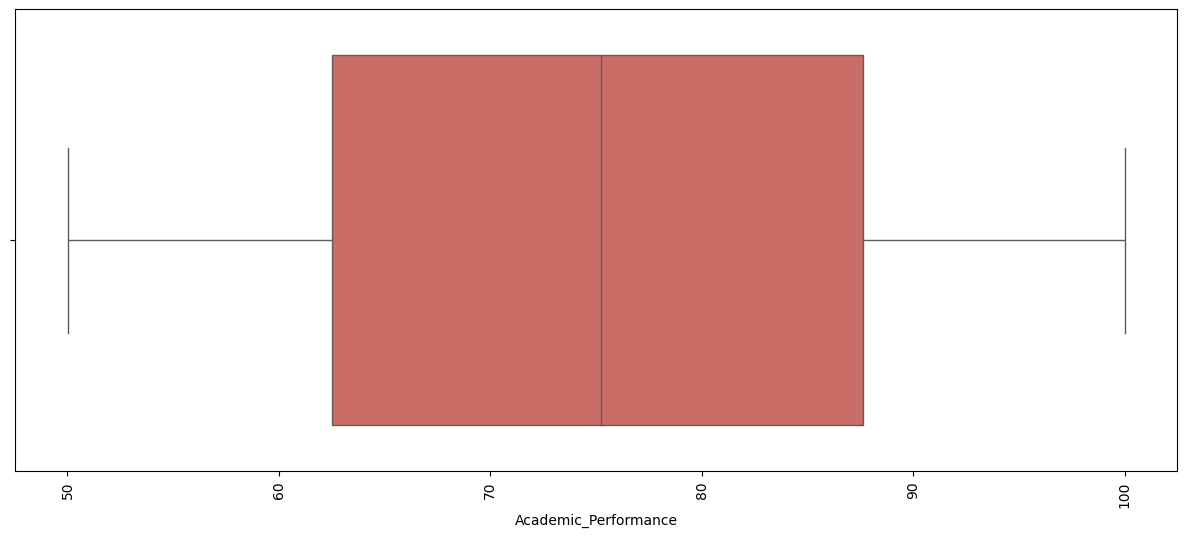

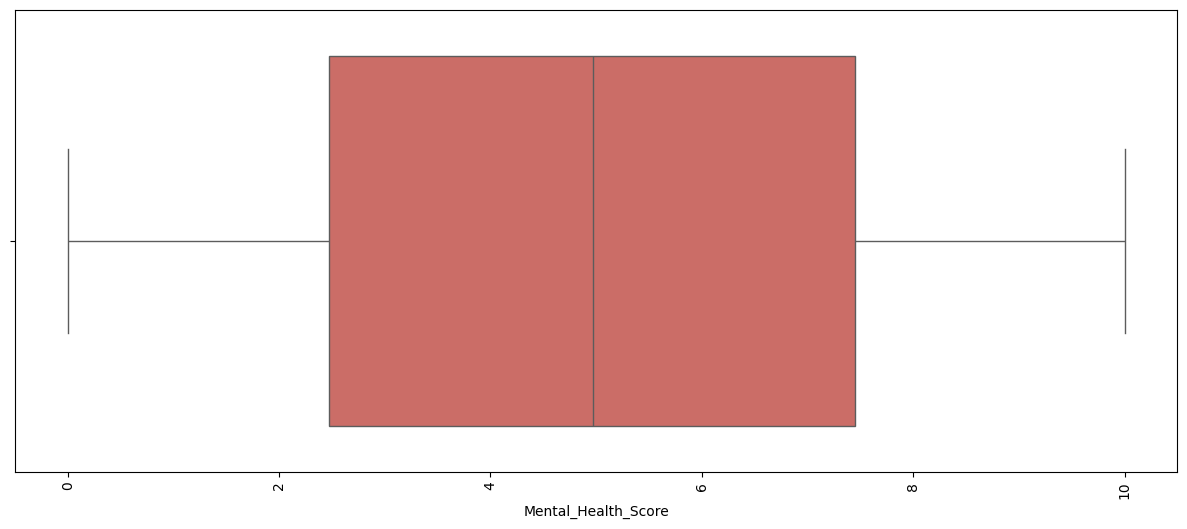

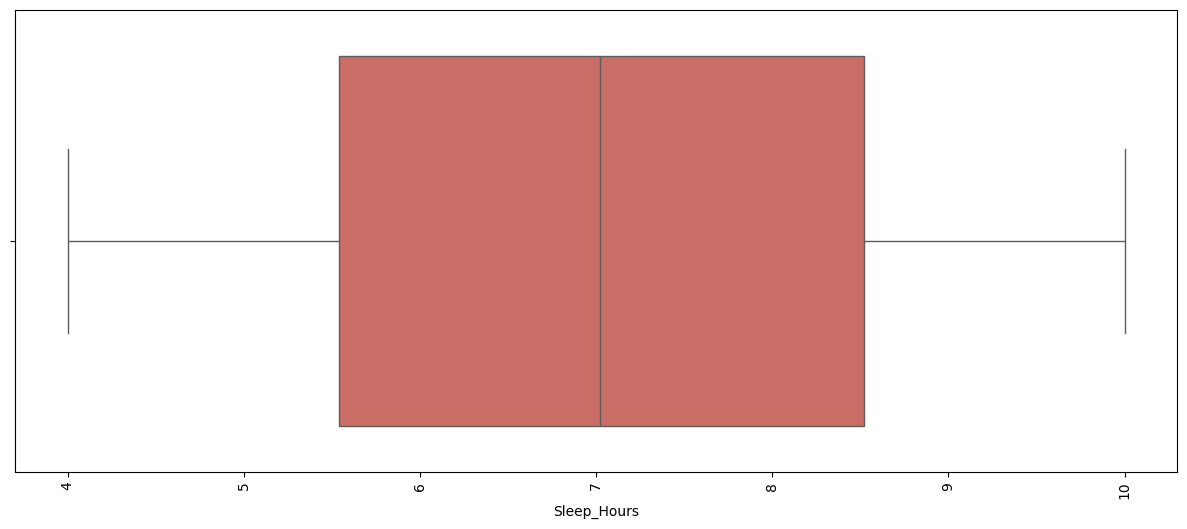

In [21]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [22]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Age
[24 22 19 18 21 23 20]

Social_Connections
[1 0 5 3 4 2]



In [23]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

Age
Age
24    1450
18    1443
22    1441
20    1438
19    1428
23    1413
21    1387
Name: count, dtype: int64

Social_Connections
Social_Connections
3    1725
4    1681
2    1681
1    1671
5    1640
0    1602
Name: count, dtype: int64



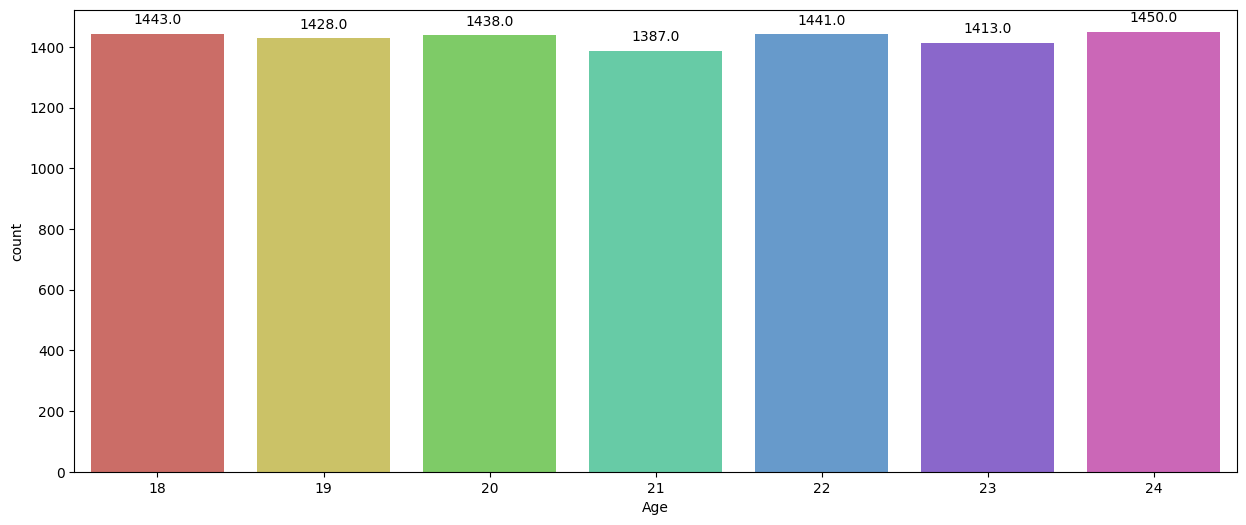

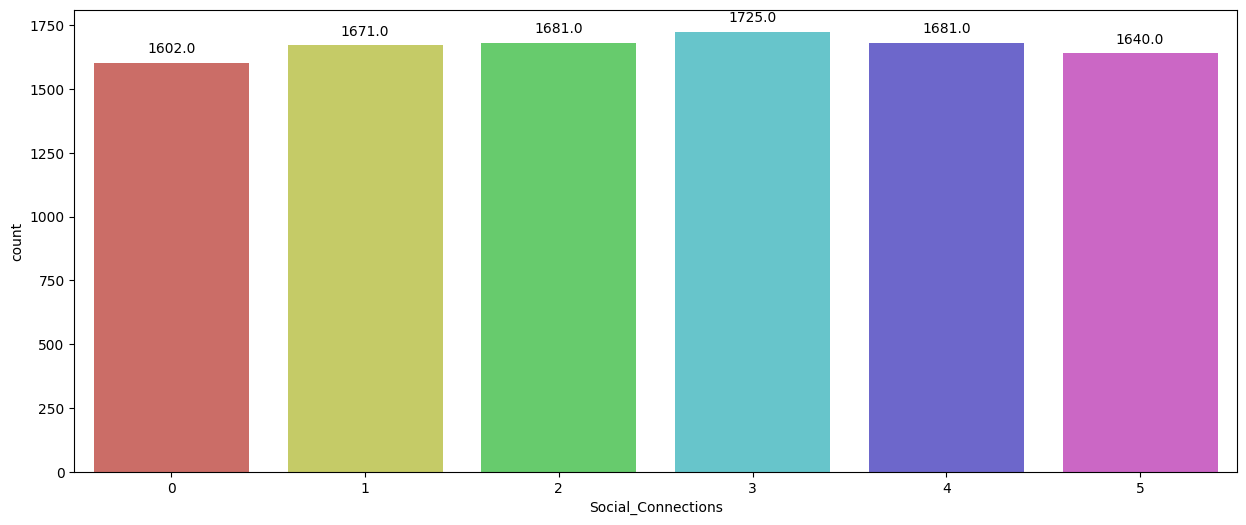

In [24]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [25]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [26]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Non-Binary' 'Female']

Year_of_Study
['4th Year' '2nd Year' '1st Year' '3rd Year']

Education_Level
['Post-Graduation' 'PhD' 'Graduation']

Course
['Science' 'Arts' 'Commerce' 'Engineering']

Family_Income
['High' 'Low' 'Medium']

Residence_Type
['Staying Home' 'Hostel' 'Outside']

Stress_Level
['High' 'Low' 'Medium']

Substance_Use
['No' 'Yes']

Past_Trauma
['No' 'Yes']

Counseling_Availability
['Yes' 'No']

Counseling_Utilization
['No' 'Yes']

Family_Support
['High' 'Medium' 'Low']

Suicidal_Thoughts
['No' 'Yes']

Suicide_Attempt
['No' 'Yes']

Reason_for_Stress
['Family issues' 'Relationship problems' 'Financial issues'
 'Academic pressure']



In [27]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Gender
Gender
Non-Binary    3351
Male          3328
Female        3321
Name: count, dtype: int64

Year_of_Study
Year_of_Study
1st Year    2548
2nd Year    2511
3rd Year    2483
4th Year    2458
Name: count, dtype: int64

Education_Level
Education_Level
Post-Graduation    3353
Graduation         3342
PhD                3305
Name: count, dtype: int64

Course
Course
Science        2525
Engineering    2519
Arts           2483
Commerce       2473
Name: count, dtype: int64

Family_Income
Family_Income
Low       3395
Medium    3327
High      3278
Name: count, dtype: int64

Residence_Type
Residence_Type
Staying Home    3439
Hostel          3285
Outside         3276
Name: count, dtype: int64

Stress_Level
Stress_Level
High      3376
Low       3345
Medium    3279
Name: count, dtype: int64

Substance_Use
Substance_Use
Yes    5067
No     4933
Name: count, dtype: int64

Past_Trauma
Past_Trauma
Yes    5076
No     4924
Name: count, dtype: int64

Counseling_Availability
Counseling_Availability
Yes    

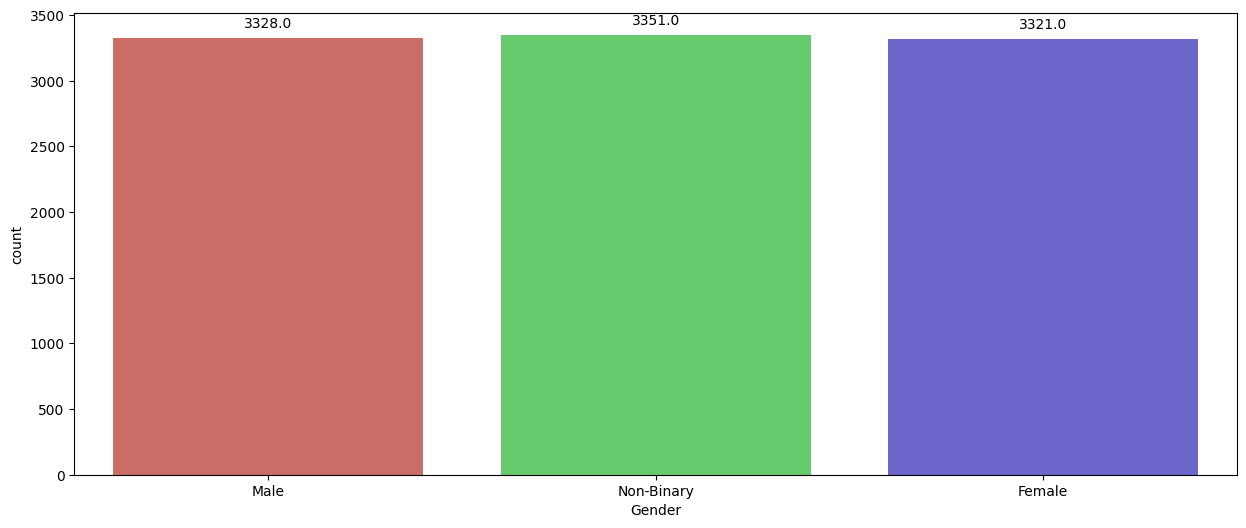

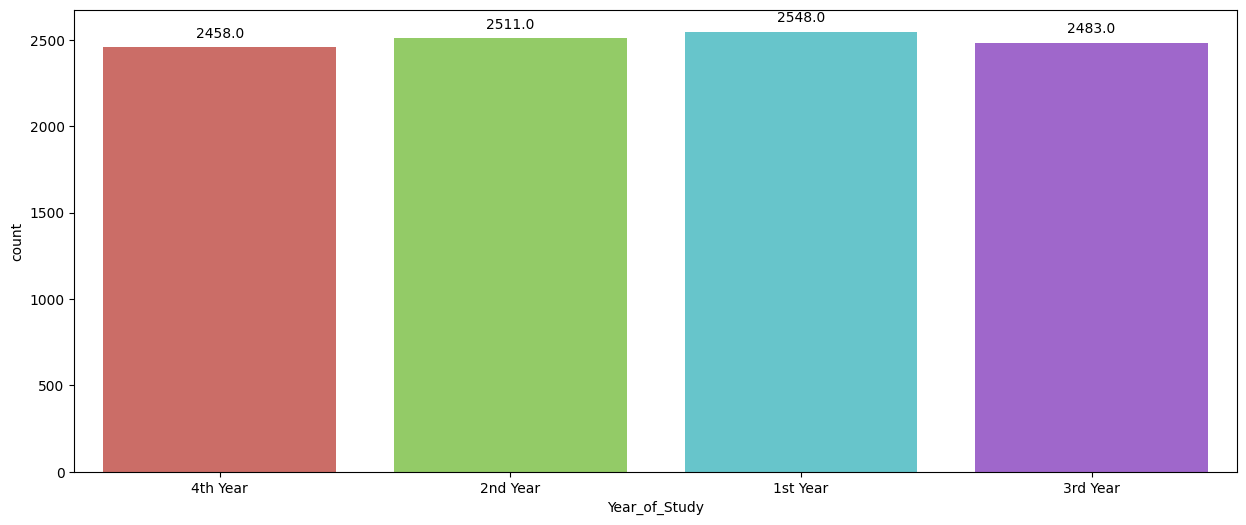

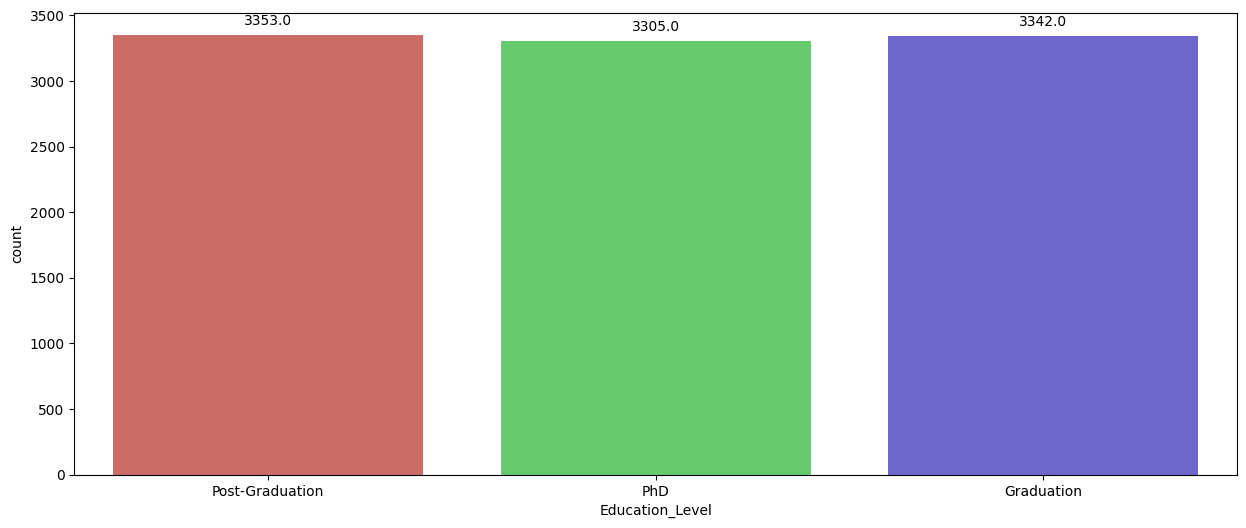

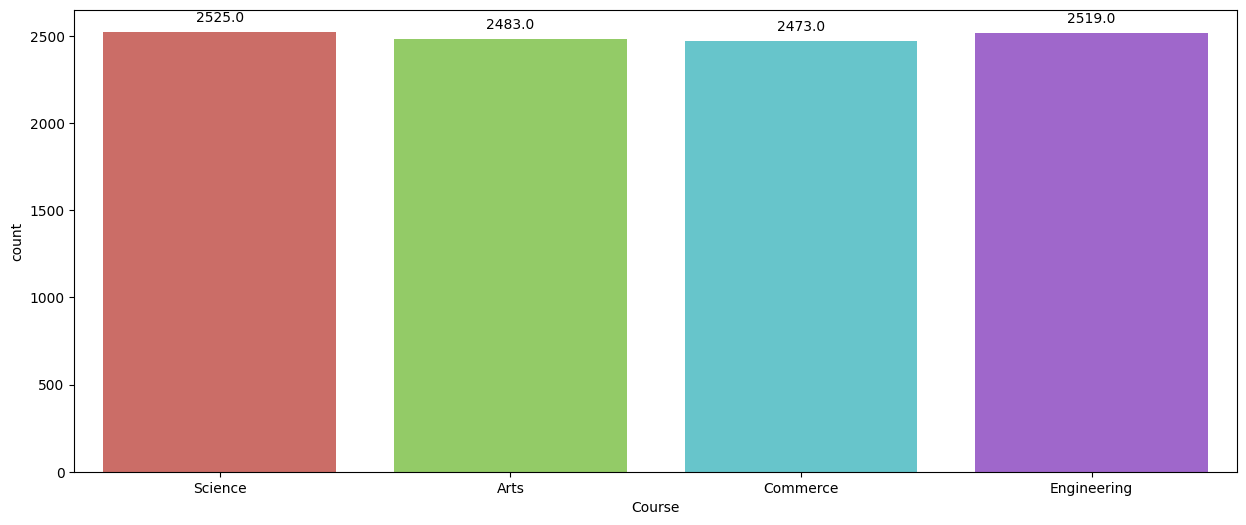

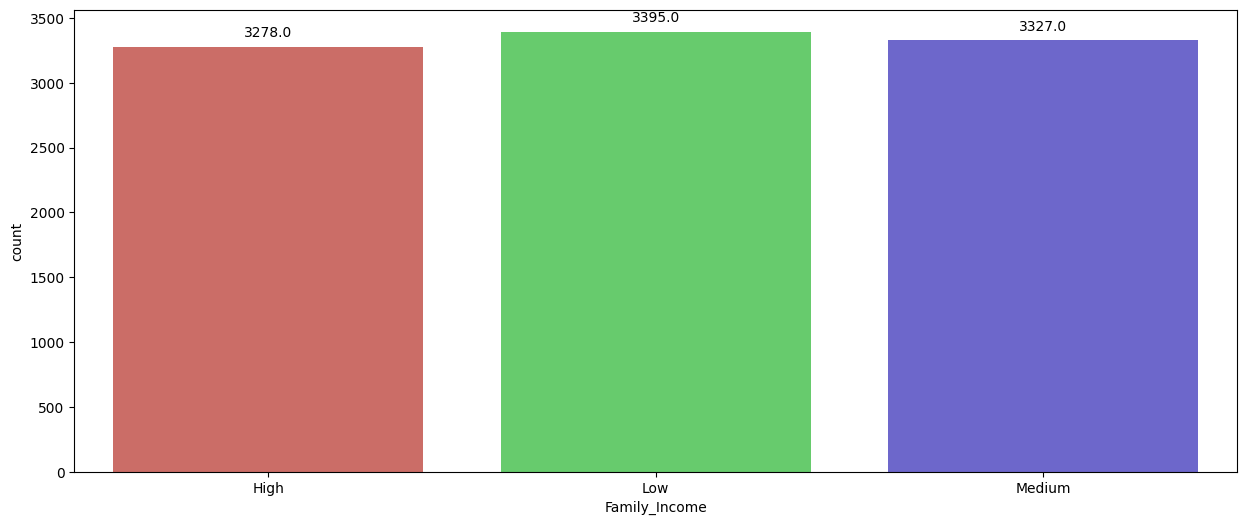

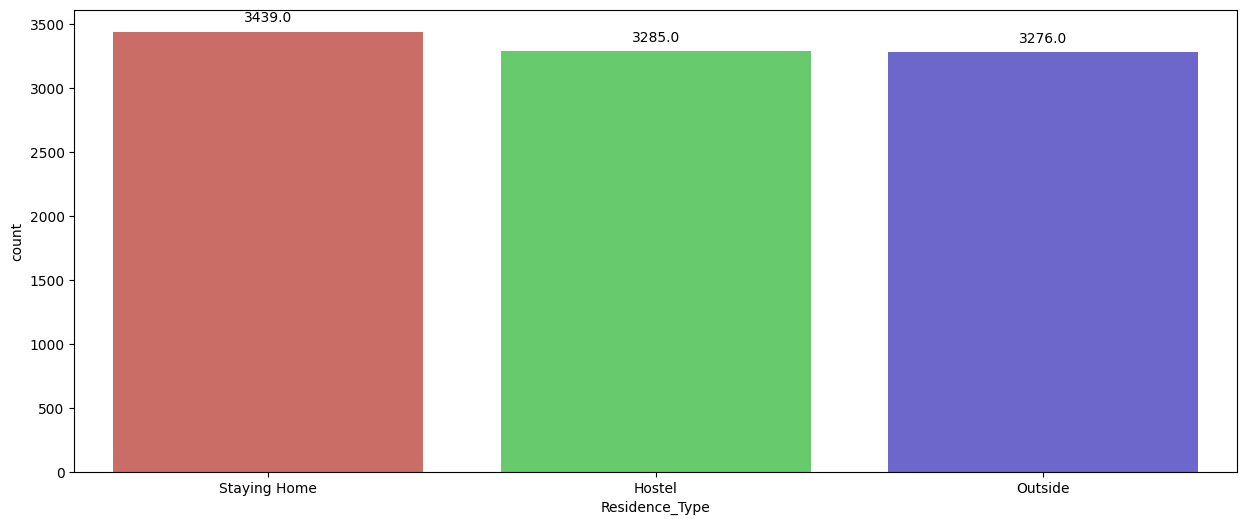

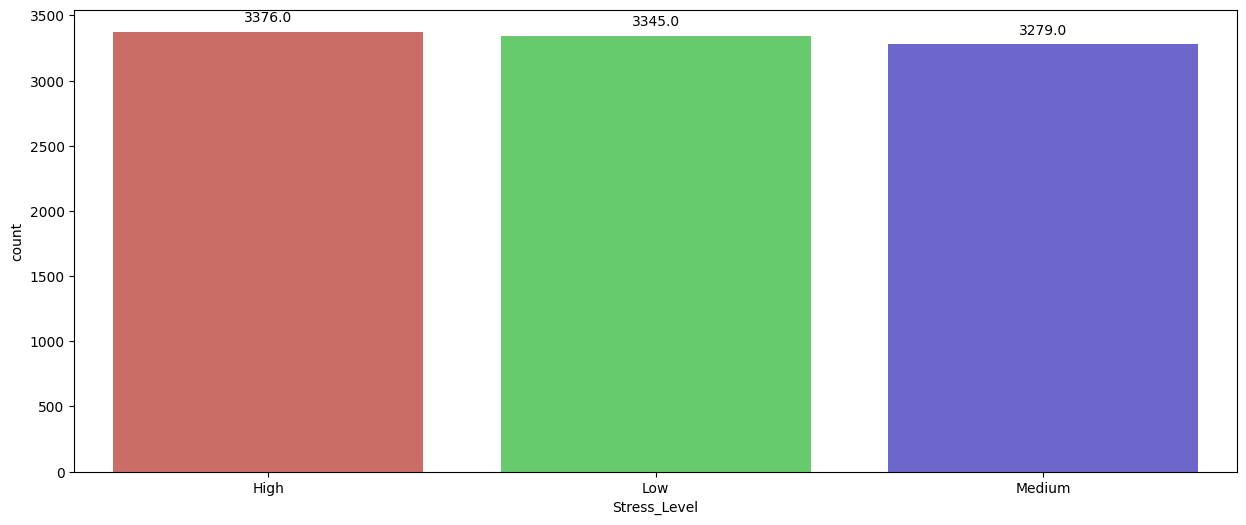

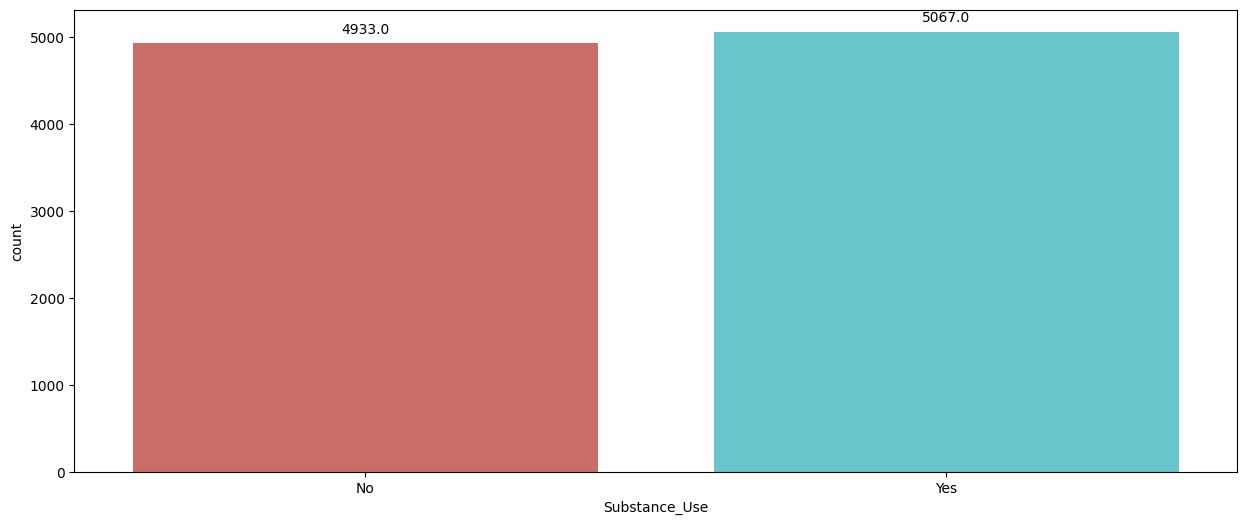

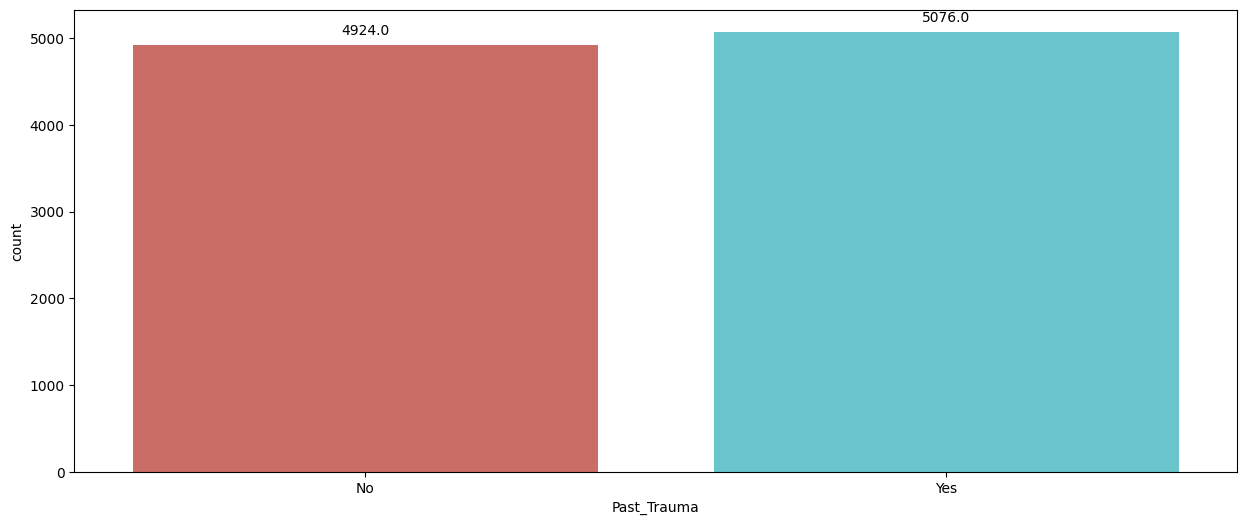

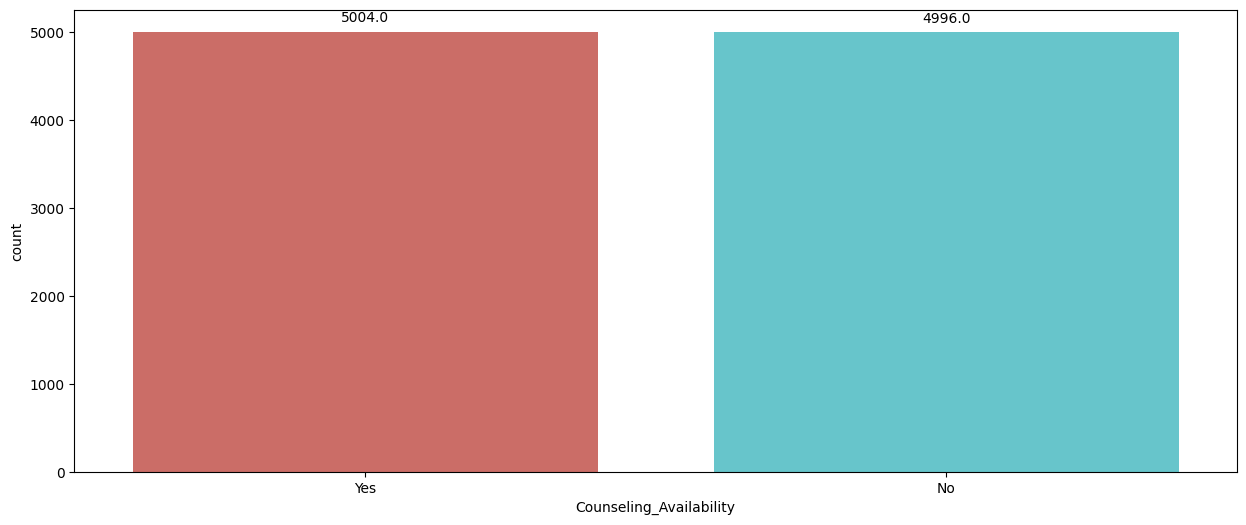

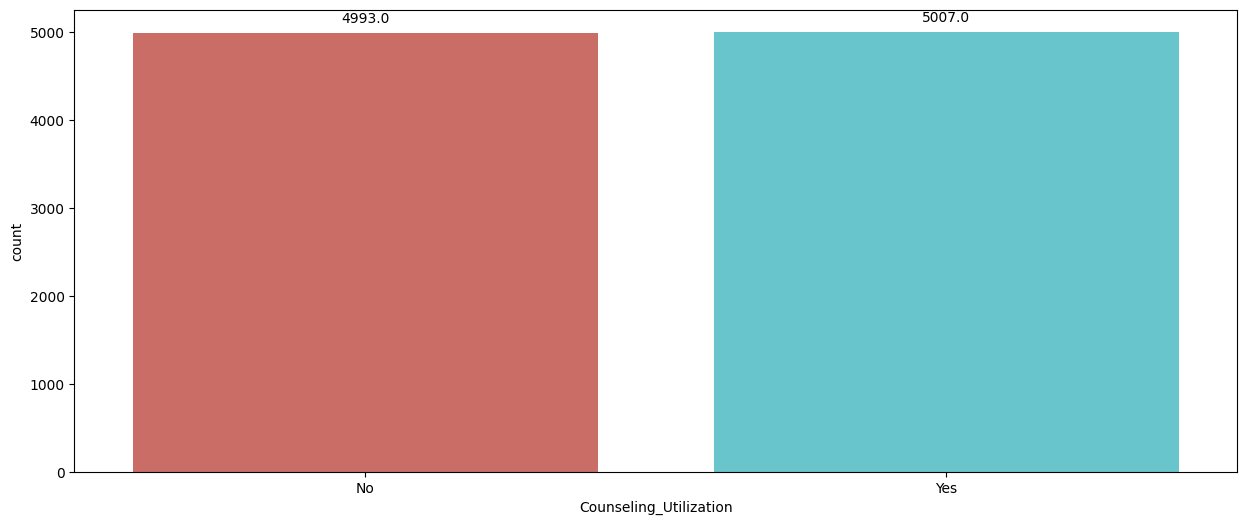

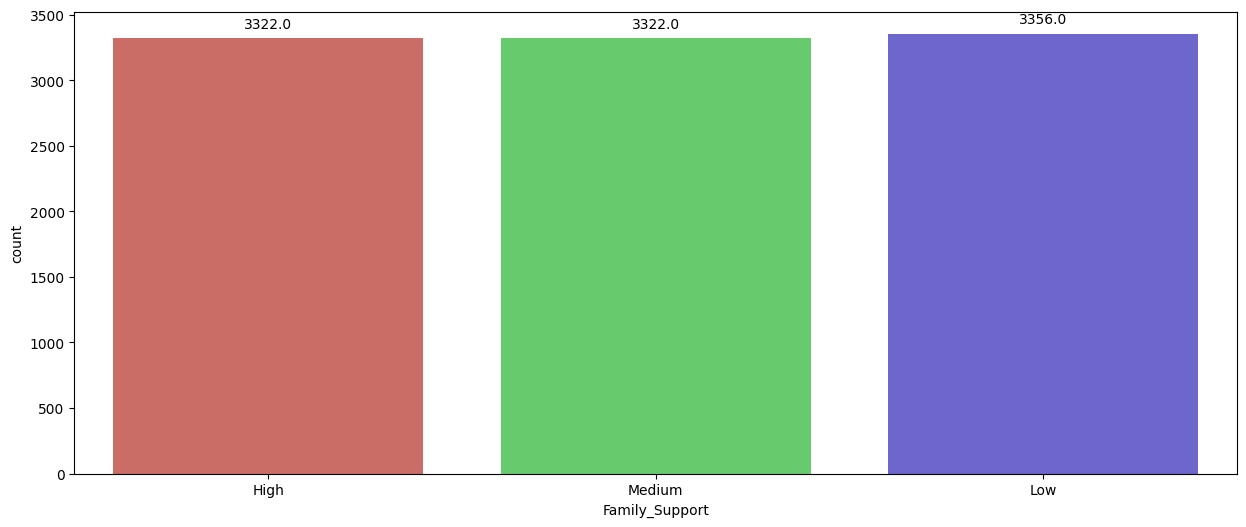

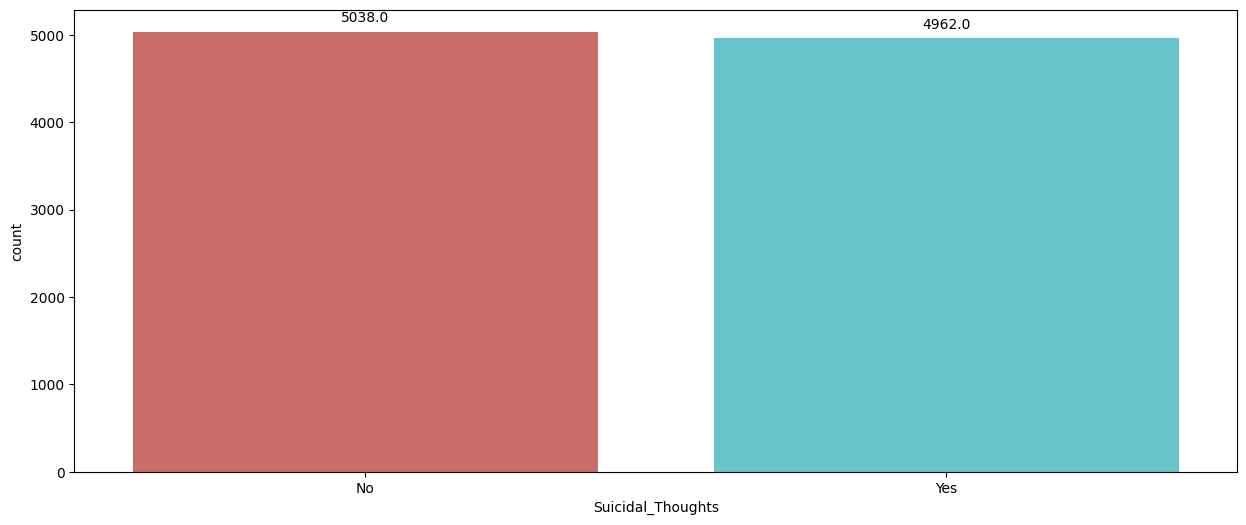

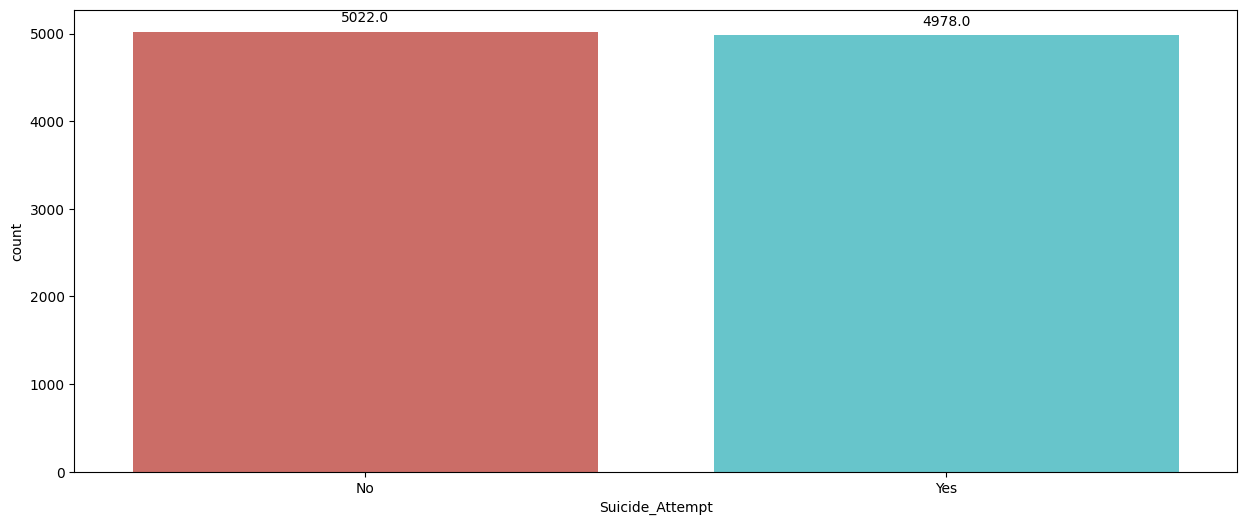

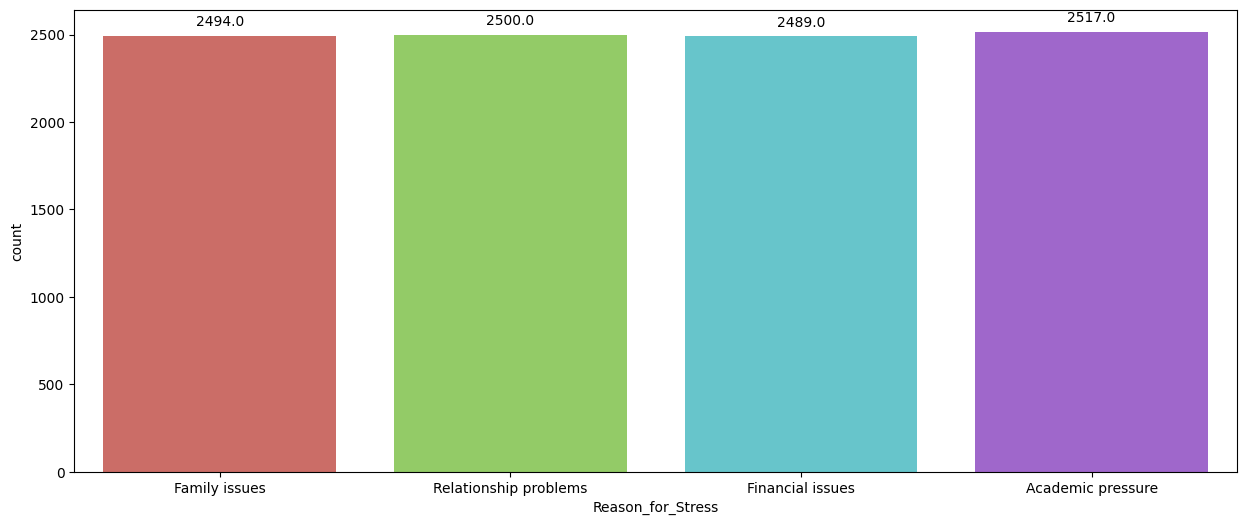

In [28]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [29]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

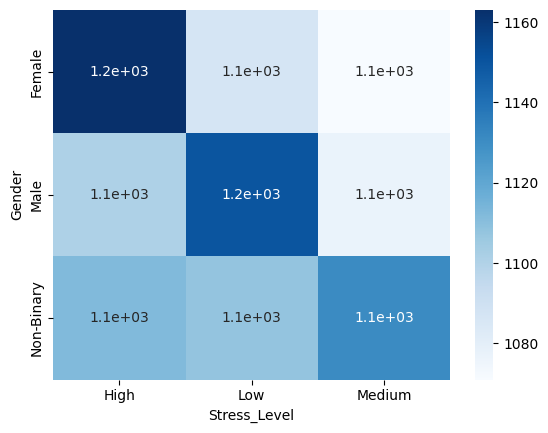

In [30]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['Gender'], df['Stress_Level'])
chi2, p, dof, ex = chi2_contingency(crosstab)

sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.show()

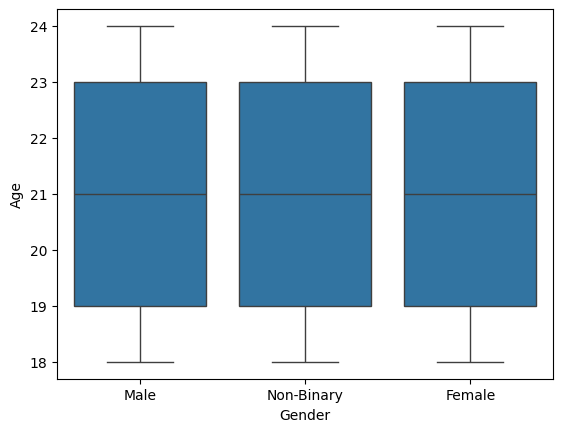

In [31]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.show()

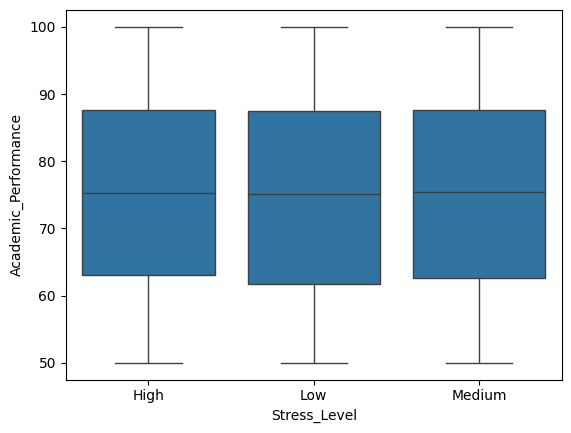

                       sum_sq      df         F    PR(>F)
C(Stress_Level)  2.418930e+02     2.0  0.582519  0.558509
Residual         2.075643e+06  9997.0       NaN       NaN


In [32]:
sns.boxplot(x='Stress_Level', y='Academic_Performance', data=df)
plt.show()

model = ols('Academic_Performance ~ C(Stress_Level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

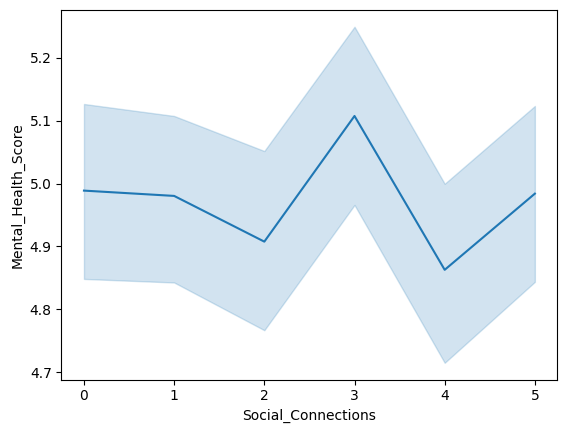

-0.0029237696237284293


In [33]:
sns.lineplot(x='Social_Connections', y='Mental_Health_Score', data=df)
plt.show()

correlation = df['Social_Connections'].corr(df['Mental_Health_Score'])
print(correlation)

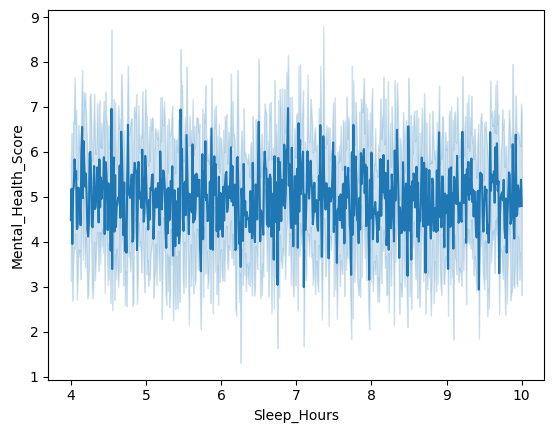

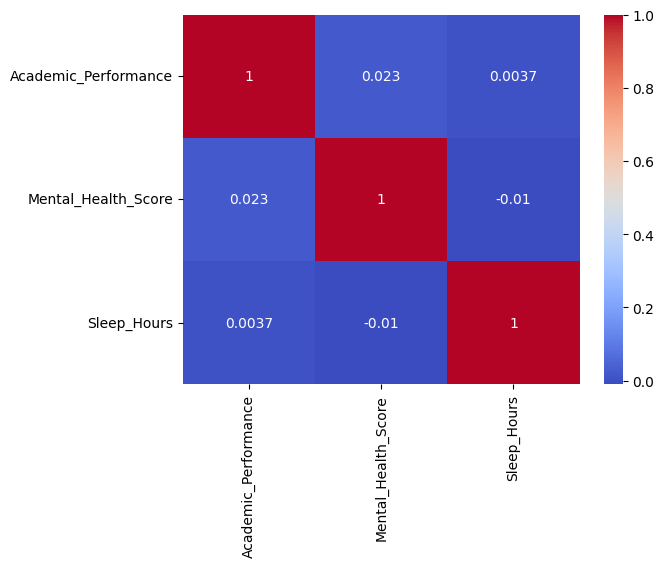

In [34]:
sns.lineplot(x='Sleep_Hours', y='Mental_Health_Score', data=df)
plt.show()

correlation_matrix = df[['Academic_Performance', 'Mental_Health_Score', 'Sleep_Hours']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

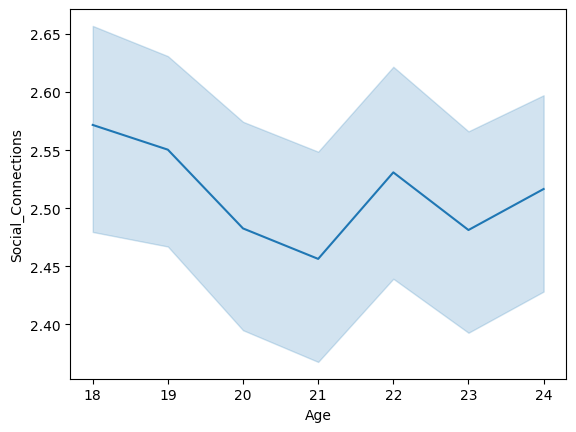

-0.010770796109171137


In [35]:
sns.lineplot(x='Age', y='Social_Connections', data=df)
plt.show()

correlation = df['Age'].corr(df['Social_Connections'])
print(correlation)

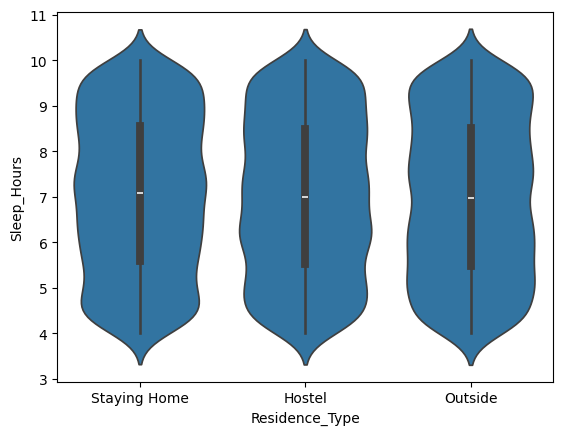

In [36]:
sns.violinplot(x='Residence_Type', y='Sleep_Hours', data=df)
plt.show()

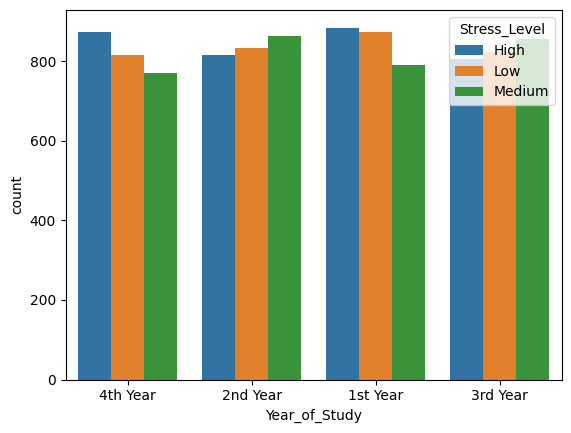

In [37]:
sns.countplot(x='Year_of_Study', hue='Stress_Level', data=df)
plt.show()

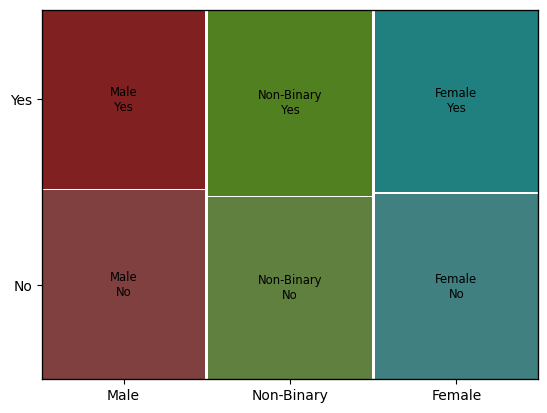

In [38]:
mosaic(df, ['Gender', 'Suicidal_Thoughts'])
plt.show()

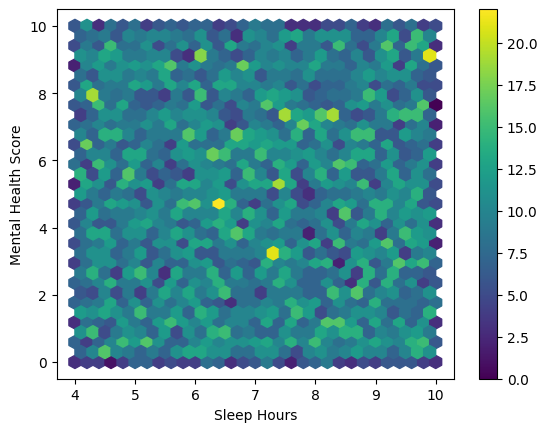

In [39]:
plt.hexbin(df['Sleep_Hours'], df['Mental_Health_Score'], gridsize=30, cmap='viridis')
plt.colorbar()
plt.xlabel('Sleep Hours')
plt.ylabel('Mental Health Score')
plt.show()

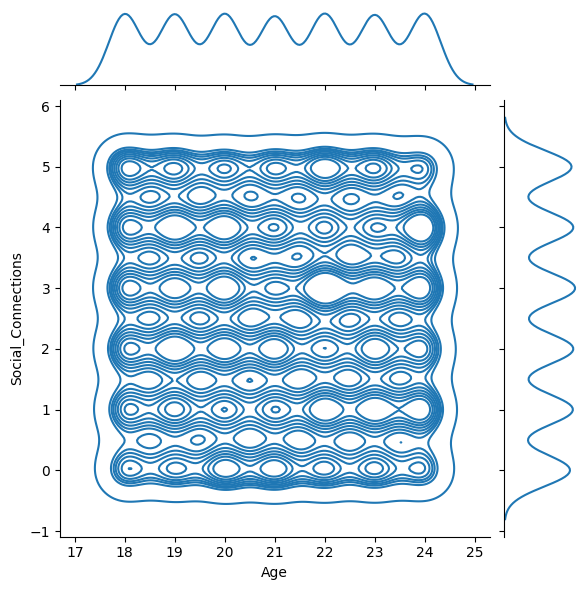

In [40]:
sns.jointplot(x='Age', y='Social_Connections', data=df, kind='kde')
plt.show()

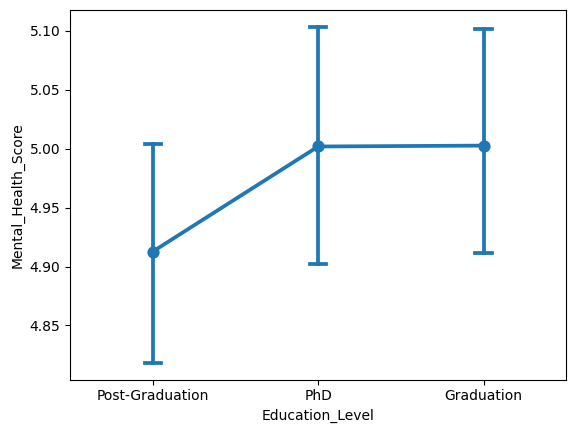

In [41]:
sns.pointplot(x='Education_Level', y='Mental_Health_Score', data=df, capsize=0.1)
plt.show()

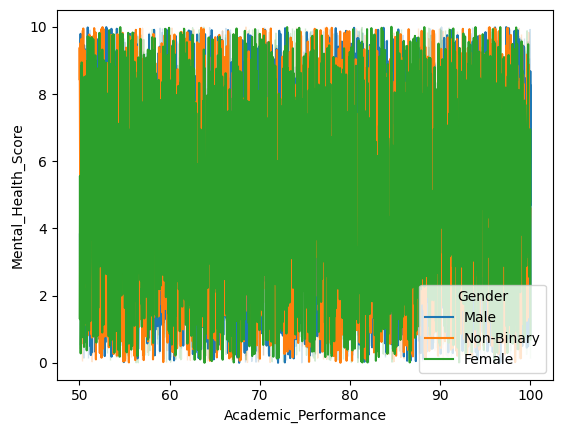

In [42]:
sns.lineplot(x='Academic_Performance', y='Mental_Health_Score', hue='Gender', data=df)
plt.show()

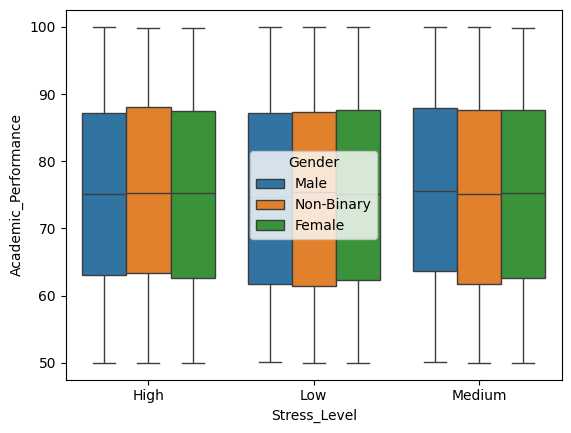

In [43]:
sns.boxplot(x='Stress_Level', y='Academic_Performance', hue='Gender', data=df)
plt.show()

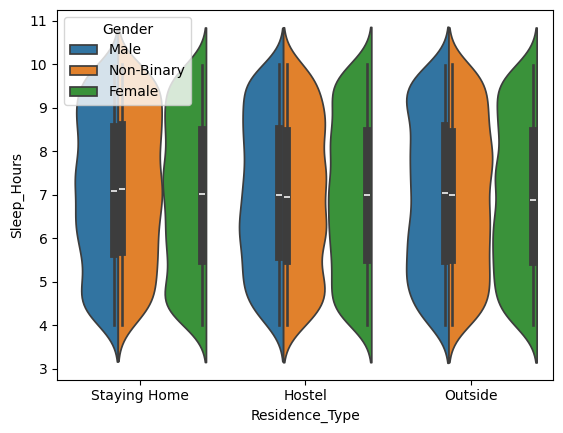

In [44]:
sns.violinplot(x='Residence_Type', y='Sleep_Hours', hue='Gender', data=df, split=True)
plt.show()

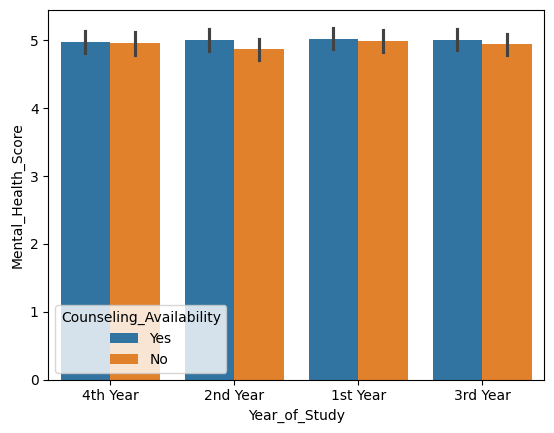

In [45]:
sns.barplot(x='Year_of_Study', y='Mental_Health_Score', hue='Counseling_Availability', data=df)
plt.show()

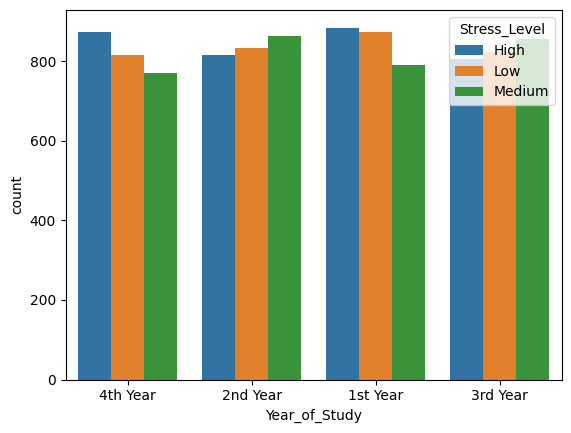

In [46]:
sns.countplot(x='Year_of_Study', hue='Stress_Level', data=df)
plt.show()

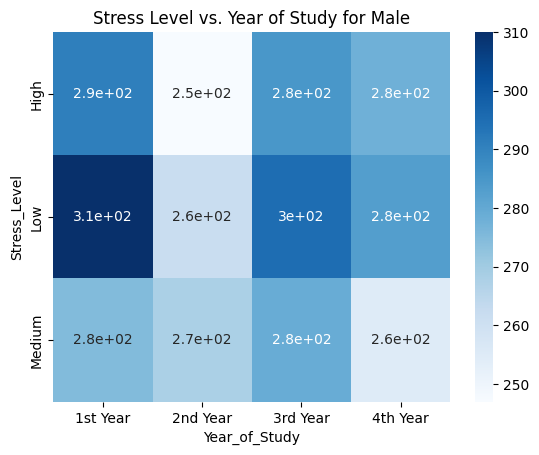

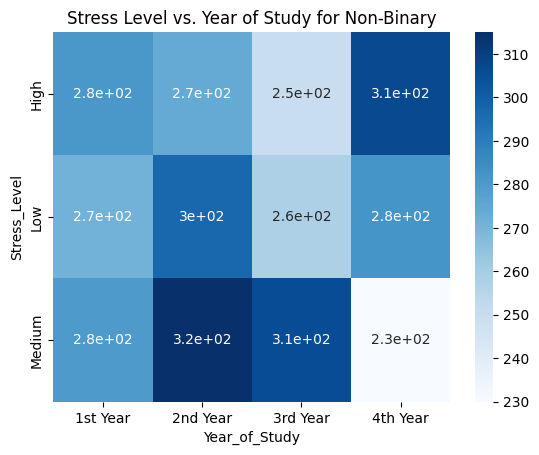

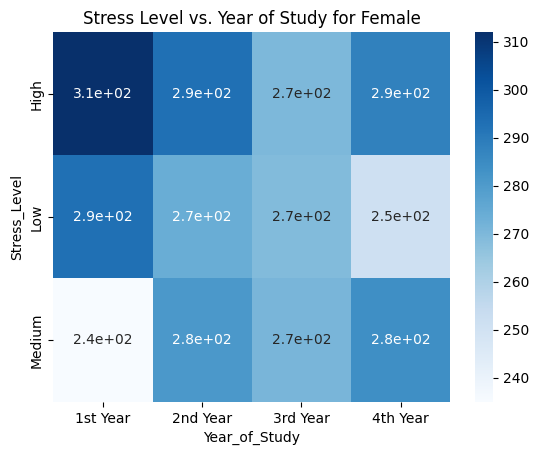

In [47]:
for gender in df['Gender'].unique():
    sns.heatmap(pd.crosstab(df['Stress_Level'], df['Year_of_Study'][df['Gender'] == gender]), annot=True, cmap='Blues')
    plt.title(f'Stress Level vs. Year of Study for {gender}')
    plt.show()

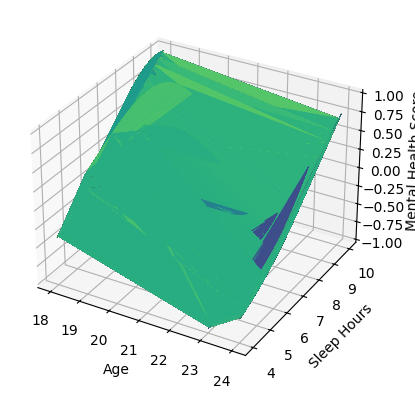

In [48]:
x = df['Age']
y = df['Sleep_Hours']
z = df['Mental_Health_Score']

x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Mental Health Score')

plt.show()

In [49]:
pivot1 = df.pivot_table(values='Mental_Health_Score', index='Year_of_Study', columns='Gender', aggfunc='mean')
print(pivot1)

Gender           Female      Male  Non-Binary
Year_of_Study                                
1st Year       4.996619  5.057146    4.970721
2nd Year       4.828750  5.069575    4.925260
3rd Year       4.912111  5.029476    4.984410
4th Year       5.080838  4.880600    4.934444


In [50]:
pivot2 = df.pivot_table(values='Age', index='Residence_Type', columns='Counseling_Availability', aggfunc='count', fill_value=0)
print(pivot2)

Counseling_Availability    No   Yes
Residence_Type                     
Hostel                   1632  1653
Outside                  1653  1623
Staying Home             1711  1728


In [51]:
pivot3 = df.pivot_table(values='Academic_Performance', index='Family_Income', columns='Family_Support', aggfunc='mean')
print(pivot3)

Family_Support       High        Low     Medium
Family_Income                                  
High            74.783939  75.576402  75.067936
Low             74.965401  75.507559  75.147911
Medium          75.069229  75.201476  74.820339


# - Thank You - #